In [ ]:
from google.colab import drive
drive.mount('\content\drive')

TIMEOUT: ignored

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/contentdrive/MyDrive/semester files/semester-5/DA/LABCYCLE/DATASETS/pizza_price_prediction_5thquestion.csv')

In [ ]:
# a)	Count the number of null values in the pizza dataset and replace null values with average of the concerned columns.
no_of_nulls = data.isnull().sum()
print("no. of null values is each column :\n",no_of_nulls)

no. of null values is each column :
 company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64


In [ ]:
# b)	Calculate average price of pizza prepared by each company.
# price = data['price_cad'].str.replace("$",'').str.strip().astype(int)
data['price_cad'] = pd.to_numeric(data['price_cad'].str.replace('[^\d+]', '', regex = True), errors='coerce')
print("average price of pizza prepared by each company : \n",data[['company','price_cad']].groupby(by = 'company').mean())

average price of pizza prepared by each company : 
          price_cad
company           
A           19.600
B           14.375
C           13.800
D           16.600
E           14.400


In [ ]:
# c)	Find the companies, who prepared pizzas with different variants with same diameter.
companies = data.groupby(by = ['company','diameter']).count()
companies

price_cad  topping  variant  size  extra_sauce  \
company diameter                                                    
A       12 inch            6        6        6     6            6   
        14 inch            2        2        2     2            2   
        16 inch            4        4        4     4            4   
        16.5 inch          2        2        2     2            2   
        18 inch            1        1        1     1            1   
        18.5 inch          4        4        4     4            4   
        20 inch            1        1        1     1            1   
        22 inch            2        2        2     2            2   
        8 inch             3        3        3     3            3   
B       12 inch           12       12       12    12           12   
        14 inch            4        4        4     4            4   
        17 inch            4        4        4     4            4   
        8.5 inch           4        4        4     4            4   
C       12 inch           10       10       10    10           10   
        14 inch           10       10       10    10           10   
        8.5 inch          10       10       10    10           10   
D       12 inch            7        7        7     7            7   
        14 inch            3        3        3     3            3   
        16 inch            1        1        1     1            1   
        16.5 inch          2        2        2     2            2   
        17 inch            1        1        1     1            1   
        18.5 inch          2        2        2     2            2   
        22 inch            1        1        1     1            1   
        8 inch             1        1        1     1            1   
        8.5 inch           2        2        2     2            2   
E       12 inch           14       14       14    14           14   
        14 inch            4        4        4     4            4   
        14 inch\n          1        1        1     1            1   
        17 inch            5        5        5     5            5   
        8.5 inch           6        6        6     6            6   

                   extra_cheese  extra_mushrooms  
company diameter                                  
A       12 inch               6                6  
        14 inch               2                2  
        16 inch               4                4  
        16.5 inch             2                2  
        18 inch               1                1  
        18.5 inch             4                4  
        20 inch               1                1  
        22 inch               2                2  
        8 inch                3                3  
B       12 inch              12               12  
        14 inch               4                4  
        17 inch               4                4  
        8.5 inch              4                4  
C       12 inch              10               10  
        14 inch              10               10  
        8.5 inch             10               10  
D       12 inch               7                7  
        14 inch               3                3  
        16 inch               1                1  
        16.5 inch             2                2  
        17 inch               1                1  
        18.5 inch             2                2  
        22 inch               1                1  
        8 inch                1                1  
        8.5 inch              2                2  
E       12 inch              14               14  
        14 inch               4                4  
        14 inch\n             1                1  
        17 inch               5                5  
        8.5 inch              6                6

pie chart showing no. of pizzas per company : 



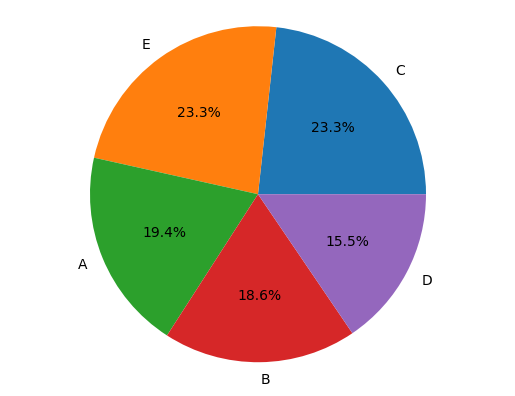

In [ ]:
# d)	Which company has more pizzas? Show the result with graph.
import matplotlib.pyplot as plt
data1 = data['company'].value_counts()
print("pie chart showing no. of pizzas per company : \n")
plt.pie(data1,labels = data1.index,autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

In [ ]:
# e)	Check whether the pizza data set contains null value or not. /Count the no. of null values in the pizza dataset./ Find the number of missing data points per column.
print("pizza data set contains null value or not : ",data.isnull().any().any())
print("no. of null values in the pizza dataset : ",data.isnull().sum().sum())
print("number of missing data points per column :\n",data.isnull().sum())

pizza data set contains null value or not :  False
no. of null values in the pizza dataset :  0
number of missing data points per column :
 company            0
price_cad          0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64


In [ ]:
# f)	Rename the column price_cad as price.
data.rename(columns = {'price_cad':'price'},inplace = True)

In [ ]:
# g)	Identify the number of companies in each category


In [ ]:
# h)	Identify which type of pizza is more expensive.
print("details about type of pizza is more expensive : \n",data.loc[data['price'] == data['price'].max(),:])

details about type of pizza is more expensive : 
   company  price diameter     topping           variant   size extra_sauce  \
4       A     30  18 inch  mozzarella  double_signature  jumbo         yes   

  extra_cheese extra_mushrooms  
4           no             yes  


In [ ]:
# i)	Find diameter of jumbo size pizza.
print("diameters of jumbo size pizza : \n",data.loc[data['size'] == 'jumbo',['diameter']])

diameters of jumbo size pizza : 
      diameter
0     22 inch
1     20 inch
4     18 inch
5   18.5 inch
6     16 inch
10  18.5 inch
11    16 inch
15  18.5 inch
16    16 inch
20    22 inch
21  18.5 inch
79  18.5 inch
80    16 inch
84    22 inch
85  18.5 inch


In [ ]:
# j)	Any jumbo pizza with diameter less than 16 exists, remove such rows.
data['diameter'] = pd.to_numeric(data['diameter'].str.replace('[^\d+]','',regex=True))
data.drop(index = data['diameter'][data['diameter'] < 16].index,inplace=True)

In [ ]:
# k)	Calculate average price of a pizza prepared by company A.
data4 = data[['company','price']].groupby(by = 'company').mean()
print("average price of a pizza prepared by company A : \n",data4.loc['A',:])

average price of a pizza prepared by company A : 
 price    22.285714
Name: A, dtype: float64


In [ ]:
# l)	Find the mean of the diameter and average price of pizzas prepared by company C.
data5 = data[['company','price','diameter']].groupby(by = 'company').mean()
print("mean of the diameter and average price of pizzas prepared by company C : \n",data5.loc['C',:])

mean of the diameter and average price of pizzas prepared by company C : 
 price       11.1
diameter    85.0
Name: C, dtype: float64


In [ ]:
# n)	Find the pizza variant with extra_mushrooms and topping with chicken.
print("pizza variant with extra_mushrooms and topping with chicken : \n")
data.loc[(data['extra_mushrooms'] == 'yes') & (data['topping'] == 'chicken'),'variant']

pizza variant with extra_mushrooms and topping with chicken : 



20     double_mix
29       new_york
37        classic
84     double_mix
88     double_mix
93       new_york
112       classic
Name: variant, dtype: object

In [ ]:
# o)	What is the most expensive pizza in each company?
print("most expensive pizza in each company : \n",data.groupby(by = 'company').max())

most expensive pizza in each company : 
          price  diameter      topping        variant     size extra_sauce  \
company                                                                     
A           30       185  smoked_beef  super_supreme  reguler         yes   
B           18        85  smoked_beef       new_york    small         yes   
C           12        85   vegetables    thai_veggie    small         yes   
D           28       185  smoked_beef       new_york    small         yes   
E           18        85         tuna     spicy tuna    small         yes   

        extra_cheese extra_mushrooms  
company                               
A                yes             yes  
B                yes             yes  
C                yes             yes  
D                yes             yes  
E                yes             yes  


In [ ]:
# q)	What is the average price of pizza in each company?
print("average price of pizza in each company : \n",data[['company','price']].groupby(by = 'company').mean())

average price of pizza in each company : 
              price
company           
A        22.285714
B        14.125000
C        11.100000
D        18.777778
E        14.000000
